In [148]:
import numpy as np
from PIL import Image

In [149]:
def process_grayscale_image(image_path, target_size=(960, 960)):
    # Step 1: Load the image and convert to grayscale
    image = Image.open(image_path).convert("L")  # "L" mode converts the image to grayscale
    
    # Step 2: Resize the image
    image_resized = image.resize(target_size)
    
    # Step 3: Convert the image to a numpy matrix
    image_matrix = np.array(image_resized)
    
    # Step 4: Vectorize the image
    image_vector = image_matrix.flatten()
    
    return image_matrix, image_vector

# Example usage
image_path = 'cat1.jpeg'  # Replace with your black-and-white image path
matrix, vector = process_grayscale_image(image_path)

print(f"Grayscale Image Matrix Shape: {matrix.shape}")  # e.g., (960, 960)
print(f"Grayscale Image Vector Length: {len(vector)}")  # e.g., 960*960


Grayscale Image Matrix Shape: (960, 960)
Grayscale Image Vector Length: 921600


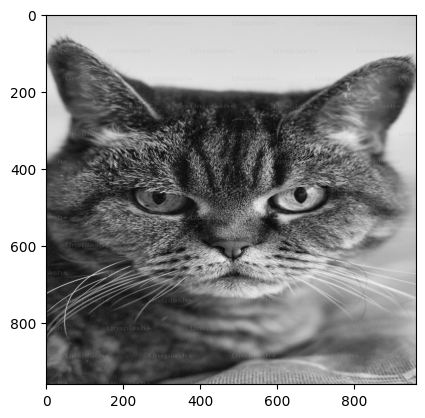

In [150]:
#invert matrix
inverse = np.invert(matrix)

#plot matrix as image
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.show()


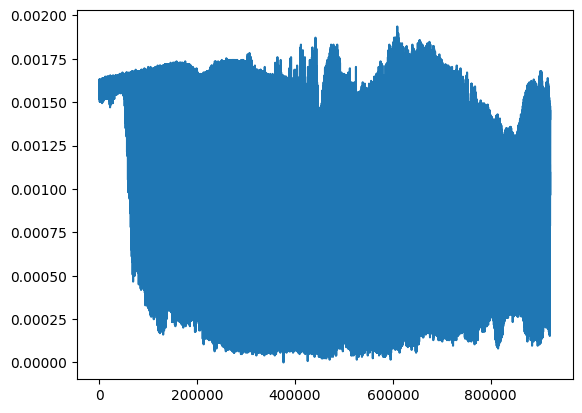

In [151]:
vector
norm_vec = vector/np.linalg.norm(vector)
#plot vector of the cat
plt.plot(norm_vec)    
plt.show()


In [152]:
norm_vec

array([0.00151882, 0.00153489, 0.00153489, ..., 0.00114112, 0.00111702,
       0.00109291])

In [153]:
x = np.random.random(1024)
x

array([0.07268044, 0.7901248 , 0.30087008, ..., 0.52083073, 0.87524566,
       0.10135472])

In [154]:
x = np.asarray(x, dtype=float)
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N, 1))
M = np.exp(-2j * np.pi * k * n / N)
np.dot(M, x)

array([511.24110421+0.j        ,   7.30806488+0.27873594j,
        -4.48171469-4.61859089j, ...,   4.66365707+0.43279277j,
        -4.48171469+4.61859089j,   7.30806488-0.27873594j])

In [178]:
import numpy as np
def gen_base(H, V, dx, dy, wavelength, f):

    """

    gen_base - Function to generate a structured grid (meshgrid) and related parameters.

    Parameters:

        H (int): Number of horizontal grid points (columns).

        V (int): Number of vertical grid points (rows).

        dx (float): Grid spacing in the horizontal direction (x-axis).

        dy (float): Grid spacing in the vertical direction (y-axis).

        wavelength (float): Wavelength of interest (not used directly in this function but passed for flexibility).

        f (float): Focal length (not used directly in this function but passed for flexibility).

    Returns:

        dict: A dictionary containing spatial and frequency domain mesh grids, grid spacings, and polar coordinates.

    """

    # Generate the spatial domain grid points for y (vertical axis)

    y = np.linspace(-(V / 2), (V / 2) - 1, V) * dy  # Scaled by vertical spacing (dy)

    # Generate the spatial domain grid points for x (horizontal axis)

    x = np.linspace(-(H / 2), (H / 2) - 1, H) * dx  # Scaled by horizontal spacing (dx)

    # Generate the frequency domain grid points for fy (vertical frequencies)

    fy =  y/ (wavelength *f)  # Normalized by grid spacing and size np.linspace(-(V / 2), (V / 2) - 1, V)*dy

    # Generate the frequency domain grid points for fx (horizontal frequencies)

    fx = x/ (wavelength * f)  # Normalized by grid spacing and size  np.linspace(-(H / 2), (H / 2) - 1, H)*dx 

    # Create the spatial domain meshgrid (Cartesian coordinates)

    X, Y = np.meshgrid(x, y)

    # Create the frequency domain meshgrid

    FX, FY = np.meshgrid(fx, fy)

    # Convert spatial domain coordinates to polar coordinates

    r = np.sqrt(X**2 + Y**2)  # Radius

    phi = np.arctan2(Y, X)    # Angle in radians

    # Store all grids and parameters in a dictionary

    base = {

        "y": y,      # Vertical grid points

        "x": x,      # Horizontal grid points

        "dx": dx,    # Grid spacing in x

        "dy": dy,    # Grid spacing in y

        "H": H,      # Number of horizontal points

        "V": V,      # Number of vertical points

        "X": X,      # Meshgrid for x-coordinates (spatial domain)

        "Y": Y,      # Meshgrid for y-coordinates (spatial domain)

        "FX": FX,    # Meshgrid for fx-coordinates (frequency domain)

        "FY": FY,    # Meshgrid for fy-coordinates (frequency domain)

        "phi": phi,  # Polar coordinate angles

        "r": r       # Polar coordinate radii

    }


    return base

Mesh = gen_base(60, 60, 8e-6, 8e-6, 633e-9,10e-3)
Mesh['FX']*Mesh['X']

array([[9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158],
       [9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158],
       [9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158],
       ...,
       [9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158],
       [9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158],
       [9.09952607, 8.50300158, 7.92669826, ..., 7.37061611, 7.92669826,
        8.50300158]])

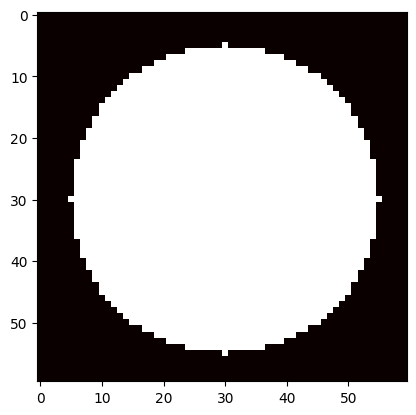

In [179]:

A = np.zeros((60, 60))+0j

A[Mesh['r']<0.2e-3] = 1

#DIsplay as heatmap
plt.imshow(np.abs(A), cmap='hot', interpolation='nearest')
plt.show()


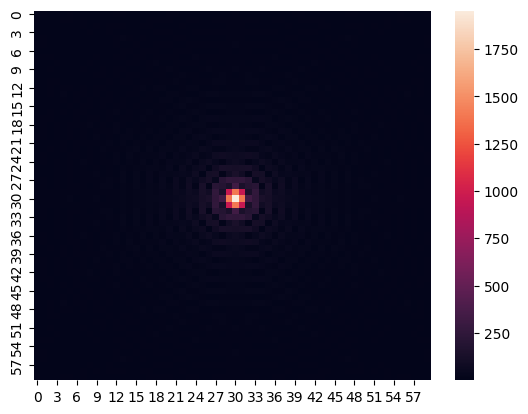

In [180]:
ffx = np.exp(-2j * np.pi * Mesh['FX'].T*Mesh['X'])
ffy = np.exp(-2j * np.pi * Mesh['FY'].T*Mesh['Y'])
res = ffx@A@(ffy)

#plot seaborn heatmap
import seaborn as sns
sns.heatmap(np.abs(res))
plt.show()


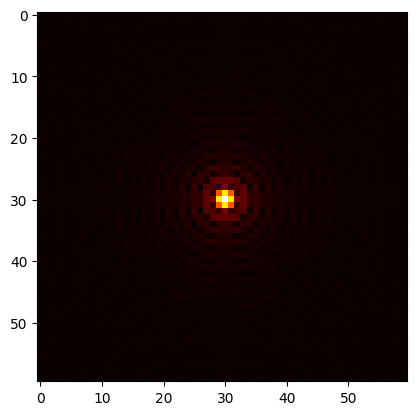

In [181]:
#tensor product of the two matrices Fx and Fy	
F = np.kron(ffx, ffy)
vecA = A.flatten()
res = F@vecA
res = res.reshape(60,60)
plt.imshow(np.abs(res), cmap='hot', interpolation='nearest')
